# AVA Dataset

In [3]:
from data import AVA
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np

dataset = AVA('data/AVA_dataset/aesthetics_image_lists/animal_train.jpgl', 
              transform=transforms.Compose([
                  transforms.Resize(256),
                  transforms.CenterCrop(256),
                  transforms.ToTensor()
              ]))

In [4]:
import torch.utils

idcs = np.arange(len(dataset))
np.random.seed(0) # This is important to split the same way every single time
np.random.shuffle(idcs)
split_idx = int(0.9 * len(dataset))
train_idcs = idcs[:split_idx]
test_idcs = idcs[split_idx:]

train_dataset = torch.utils.data.Subset(dataset, train_idcs)
test_dataset = torch.utils.data.Subset(dataset, test_idcs)

### Toggle cell below for sample debugging

In [18]:
train_dataset = torch.utils.data.Subset(train_dataset, range(512)) 
test_dataset = torch.utils.data.Subset(test_dataset, range(512))

In [77]:
train_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=1, shuffle=True, num_workers=2)
    
test_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=1, shuffle=True, num_workers=2)

In [78]:
an_item = dataset[0]
img = an_item[0]
labels = an_item[1]
labels / labels.sum()

array([0.        , 0.        , 0.06976744, 0.14728682, 0.48837209,
       0.19379845, 0.06976744, 0.01550388, 0.00775194, 0.00775194])

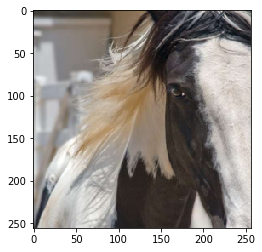

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fc66829d4a8>>
Traceback (most recent call last):
  File "/home/jupyter/.local/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/home/jupyter/.local/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 711, in _shutdown_workers
    q.close()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 134, in close
    self._reader.close()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


In [79]:
plt.imshow(img.numpy().transpose((1,2,0)))

# Simple Model

In [96]:
from models import Classifier
import torch
import torch.nn.functional as F

device = torch.device("cpu")
model = Classifier(256, 10)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [97]:
len(train_loader.dataset)

512

In [102]:
foo = torch.zeros(2)
foo

tensor([0., 0.])

In [98]:
from tqdm import tqdm

In [99]:
def train(epoch):
    model.train()
    model.to(device)
    total_loss = 0
    for data, labels in (train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        labels = labels.float()
        labels = labels / labels.sum(dim=1)
        preds = model(data)
        log_preds = preds.log()
        print(preds, labels)
        print("\n")
        loss = F.kl_div(log_preds, labels, reduction='sum')
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_loss = total_loss / len(train_loader.dataset)
    print("Epoch {} Avg Loss {}".format(epoch, avg_loss))

In [100]:
train(0)

tensor([[0.0685, 0.1640, 0.1345, 0.0619, 0.1234, 0.0887, 0.1347, 0.1183, 0.0365,
         0.0695]], grad_fn=<SoftmaxBackward>) tensor([[0.0000, 0.0060, 0.0359, 0.0539, 0.2934, 0.3293, 0.1737, 0.0898, 0.0120,
         0.0060]])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.2779, 0.3233, 0.3987, 0.0000, 0.0000,
         0.0000]], grad_fn=<SoftmaxBackward>) tensor([[0.0000, 0.0041, 0.0082, 0.0449, 0.2898, 0.3959, 0.1592, 0.0735, 0.0163,
         0.0082]])


tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<SoftmaxBackward>) tensor([[0.0000, 0.0106, 0.0319, 0.1011, 0.1436, 0.2447, 0.2287, 0.1277, 0.0745,
         0.0372]])


tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<SoftmaxBackward>) tensor([[0.0000, 0.0063, 0.0063, 0.0633, 0.2722, 0.3861, 0.1962, 0.0316, 0.0253,
         0.0127]])


tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<SoftmaxBackward>) tensor([[0.0000, 0.0054, 0.0217, 0.1033, 0.2772, 0.36